# Linear Regression 

## From Scratch

The first model most people will be introduced to when exploring Data Science or Machine Learning is Linear Regression. Linear Regression is a great first model to be introduced too because first it is generally easy to understand (relatively speaking) and second it will help you start understanding how data interacts with one another and how models use it to make a prediction.

## Two forms of Linear of Regression

### 1. Simple Regression

### 2. Multivariate Linear Regression

Now another reason why linear regression is a great model to start out with is because it can be scaled up. meaning we can start small and simple and make the model more complicated. So "Simple Regression" is what we are going to start with and then once we feel like we got a good grasp on the math and the interactions of the model we can scale it up and really show the power behind linear regression.

# Simple Model

## Before we Start

I started by saying that linear regression is a great model to start out with and it is! However, we need to get our feet wet with some mathematics. 
<br>
I first learned about Linear Regression in my undergrad in economics, however, the math remains constant so lets start here. I will explain how the model functions in words and i will provide the mathematical Definition.

## Understanding the Mathematics

So if we are using linear regression we are assuming we have a regression type problem. What does that mean? it is best explained through a sports analogy. If we are watching a basketball game we can predict two types of outcomes. First, we can predict a win or loss, and second we can predict the score of the winning team. If we try and predict win or loss then we have a classification problem a binary type of prediction (classification problems can be more than just binary though). If we try and predict the score then we have a regression type problem and this is a problem linear regression is capable of handling.

With simple linear regression we have one input variable "X" and an output variable "Y". We want to try and create a linear relationship between X and Y. X is ussually refered as the independent variable and Y is refered to as the dependent variable (our output "Y" is dependent on our input "X")

The Mathematical definition looks like:

$Y={\beta_0}+{\beta_1}X$

<br>

${\beta_0}$: Coefficient

<br>

${\beta_1}$: Bias Coefficient

this formula resembles the y=mx+b with m:${\beta_1}$ and b=${\beta_0}$
<br>

so in short we are going to try and draw a line between X and Y which will estimate the relationship between the two variables

Now that we know the math we can begin solving the problem. The first part of the problem we need to tackle is how do we obtain the Coefficients. There are two approaches you may be introduced with: 
<br>
OLS or Gradient Descent

# OLS Ordinary Least Square Method

We will use OLS for the simple regression equation

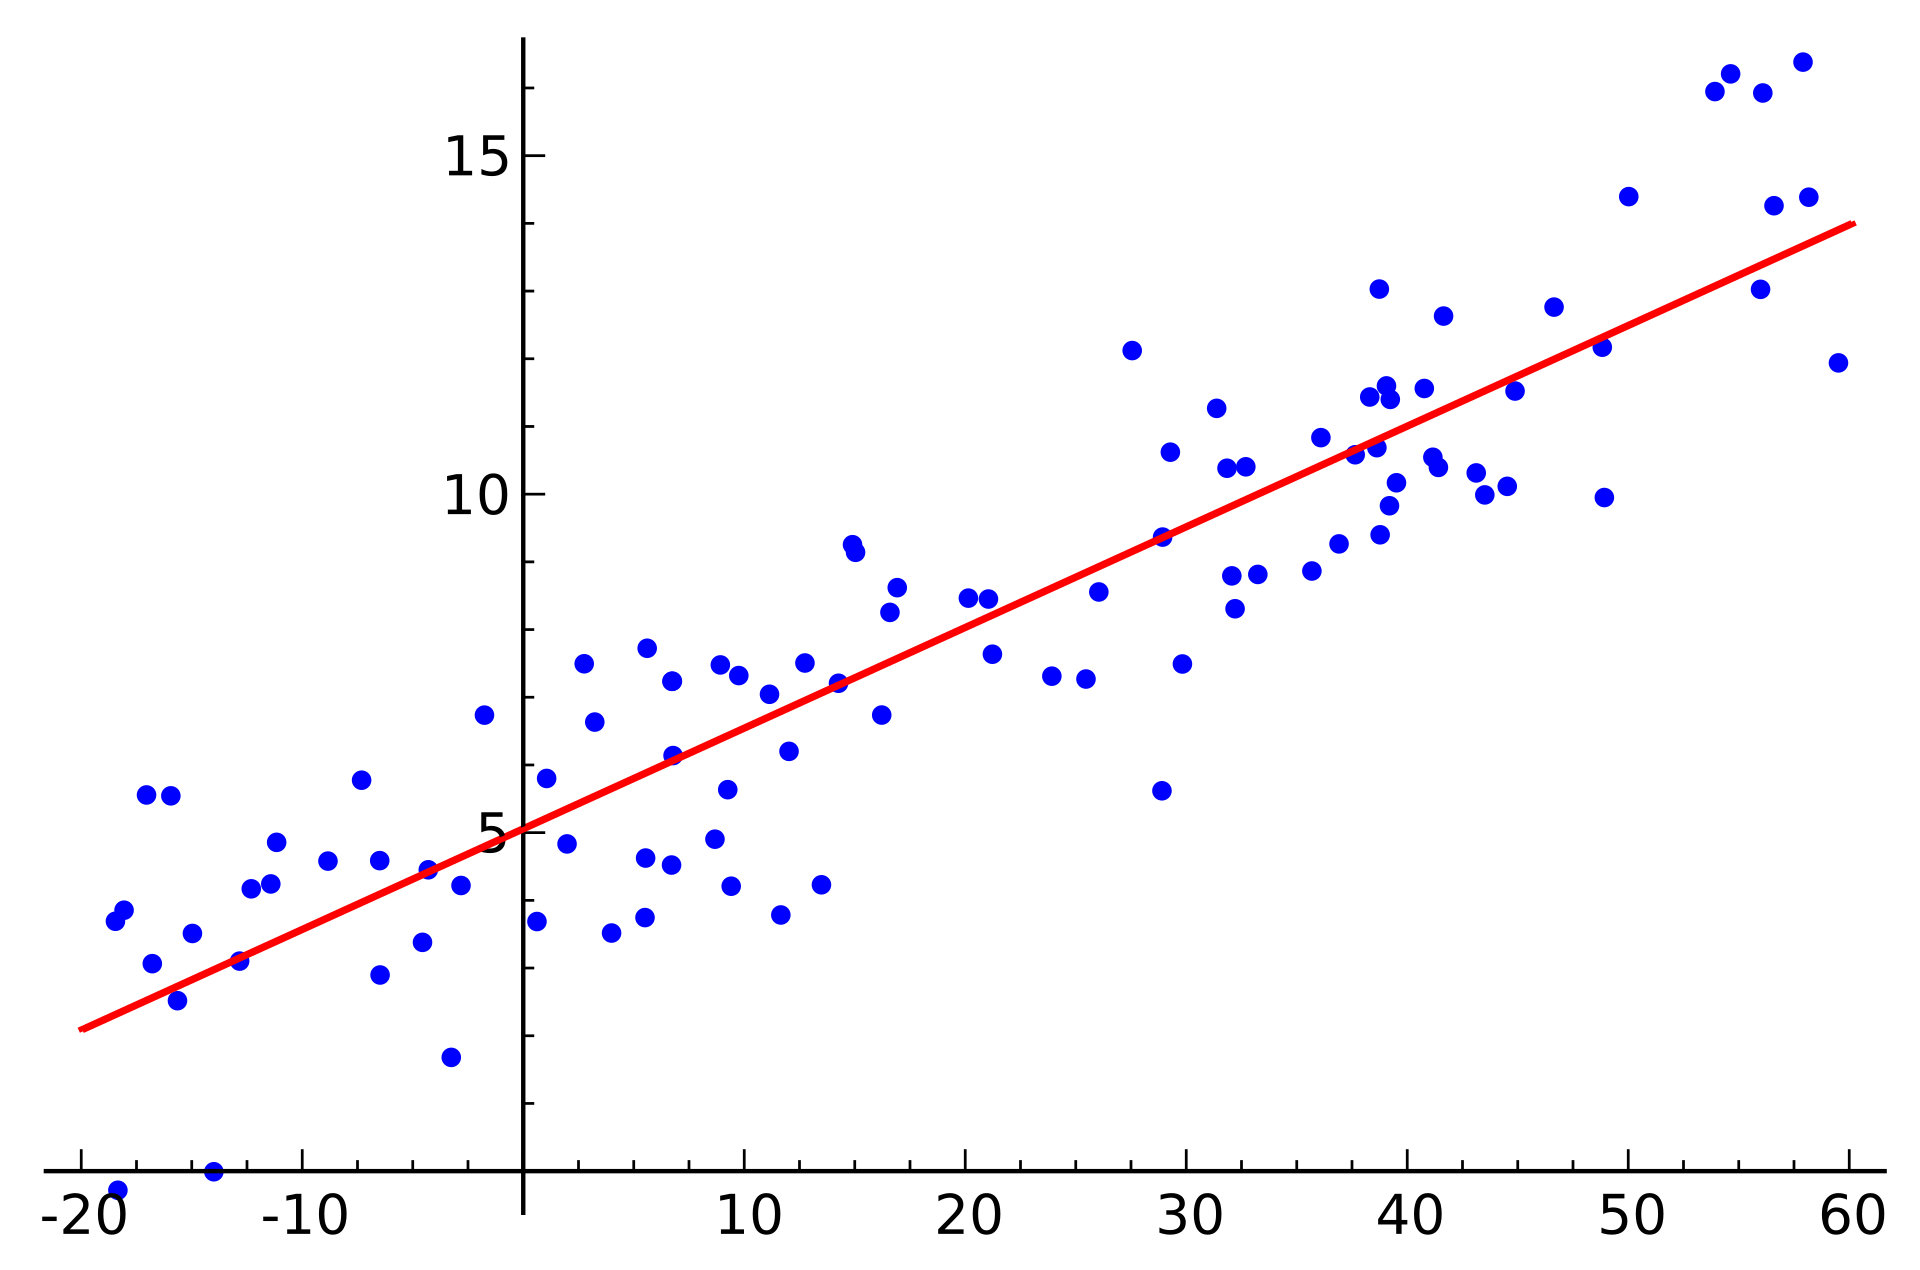

In [1]:
from IPython.display import Image
Image('/Users/connerleavitt/Desktop/Cool-Code/OLS.png')

Learn more about OLS here: https://en.wikipedia.org/wiki/Ordinary_least_squares#/media/File:Linear_regression.svg

We want want to try to minimize the error of the line or the distance between the dots and the line.

The total error of the model visualized above is the sum of all erros of each point on the graph:

$D = \sum_{i=1}^m d_i^2$

d: distance between the line and the ith point
<br>
M: total number of points

we square the distance because we have points above and below the line

After all the mathematics we are left with 3 equations

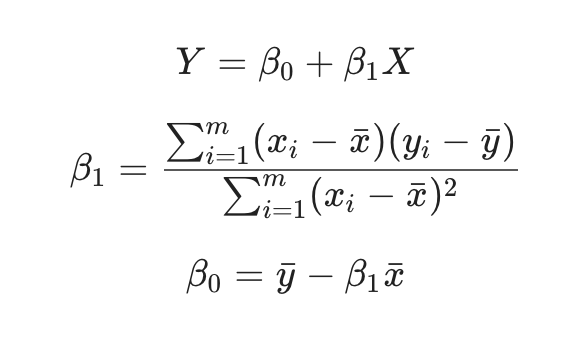

In [2]:
Image('/Users/connerleavitt/Desktop/Cool-Code/Equations.png')

# Coding the Model

We are going to use a data set that contains headsize and brain weight for a variety of people.

In [3]:
#import the required libaries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
#read in data
data = pd.read_excel('/Users/connerleavitt/Desktop/Cool-Code/brainweight.xlsx')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237 entries, 0 to 236
Data columns (total 4 columns):
Gender                 237 non-null int64
Age Range              237 non-null int64
Head Size(cm^3)        237 non-null int64
Brain Weight(grams)    237 non-null int64
dtypes: int64(4)
memory usage: 7.5 KB


In [5]:
#Collecting X and Y
X = data['Head Size(cm^3)'].values
Y = data['Brain Weight(grams)'].values

To find the values $\beta_1$ 
​	  and $\beta_0$ 
​	 , we will need mean of X and Y. We will find these and the coeffients.

In [6]:
# Mean X and Y
mean_x = np.mean(X)
mean_y = np.mean(Y)

# Total number of values
m = len(X)

# Using the formula to calculate b1 and b2
numer = 0
denom = 0
for i in range(m):
    numer += (X[i] - mean_x) * (Y[i] - mean_y)
    denom += (X[i] - mean_x) ** 2
b1 = numer / denom
b0 = mean_y - (b1 * mean_x)

# Print coefficients
print(b1, b0)

0.26342933948939945 325.57342104944223


So our model looks like: BrainWeight = 325.5 + 0.2634293*HeadSize


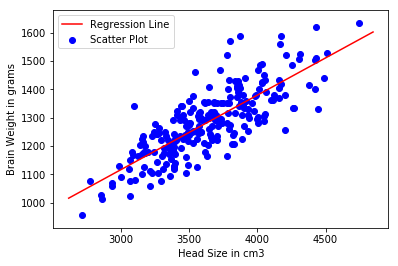

In [7]:
# Plotting Values and Regression Line

max_x = np.max(X) + 100
min_x = np.min(X) - 100

# Calculating line values x and y
x = np.linspace(min_x, max_x, 1000)
y = b0 + b1 * x

# Ploting Line
plt.plot(x, y, color='r', label='Regression Line')
# Ploting Scatter Points
plt.scatter(X, Y, c='b', label='Scatter Plot')

plt.xlabel('Head Size in cm3')
plt.ylabel('Brain Weight in grams')
plt.legend()
plt.show()

This model is not so bad. But we need to find out how good the model is. There are many methods to evaluate models. We will use Root Mean Squared Error and Coefficient of Determination(R^2 Score).

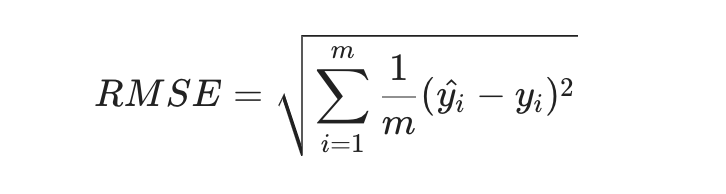

In [8]:
Image('/Users/connerleavitt/Desktop/Cool-Code/RMSE.png')

Root Mean Squared Error is the square root of sum of all errors divided by number of values

In [9]:
# Calculating Root Mean Squares Error
rmse = 0
for i in range(m):
    y_pred = b0 + b1 * X[i]
    rmse += (Y[i] - y_pred) ** 2
rmse = np.sqrt(rmse/m)
print(rmse)

72.1206213783709


R^2:

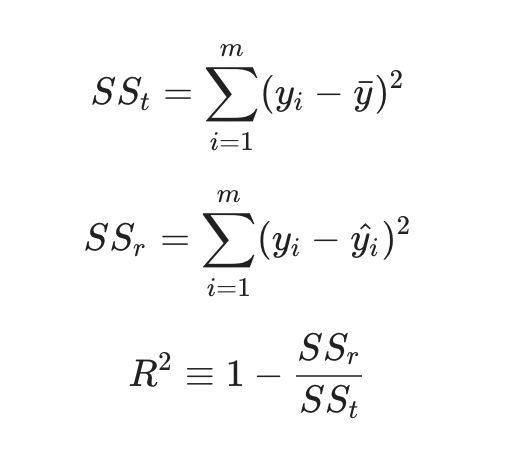

In [10]:
Image('/Users/connerleavitt/Desktop/Cool-Code/R^2.png')

is a statistical measure that represents the proportion of the variance for a dependent variable that's explained by an independent variable or variables in a regression model. ... So, if the R2 of a model is 0.50, then approximately half of the observed variation can be explained by the model's inputs.

In [11]:
ss_t = 0
ss_r = 0
for i in range(m):
    y_pred = b0 + b1 * X[i]
    ss_t += (Y[i] - mean_y) ** 2
    ss_r += (Y[i] - y_pred) ** 2
r2 = 1 - (ss_r/ss_t)
print(r2)

0.6393117199570003


# Compare
Lets compare our model to Scikit-learn to see how well we did. 

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Cannot use Rank 1 matrix in scikit learn
X = X.reshape((m, 1))
# Creating Model
reg = LinearRegression()
# Fitting training data
reg = reg.fit(X, Y)
# Y Prediction
Y_pred = reg.predict(X)

# Calculating RMSE and R2 Score
mse = mean_squared_error(Y, Y_pred)
rmse = np.sqrt(mse)
r2_score = reg.score(X, Y)

print(np.sqrt(mse))
print(r2_score)

72.1206213783709
0.639311719957


Wow we did a great job. The data was simple so it wasn't hard to get similar results but it validates our model from scratch!